In [2]:
def read_student_data(file_path):
    """Read data from csv file and return"""
    students_list = []
    with open(file_path, mode='r') as file:
        headers = file.readline().strip().split(",")
        for line in file:
            student = {}
            values = line.strip().split(",")
            for i, header in enumerate(headers):
                student[header.strip()] = values[i].strip()
                if header.strip() == "CGPA":
                    student[header.strip()] = float(student[header.strip()])

            students_list.append(student)

    return students_list


def pick_student(all_students, tut_grp):
    """pick student out from the tutorial group"""
    students_list = []

    for student in all_students:
        if student['Tutorial Group'] == f'G-{tut_grp}':
            students_list.append(student)

    return students_list


def diverse_team(size_team, sorted_student_more, sorted_student_less):  # size of team, index(0,-1,or middle)
    team = []
    i = 0  # round
    sorted_student = [sorted_student_more, sorted_student_less]

    gender_run_two_time = False
    if size_team % 2 == 0 and len(sorted_student_more) - len(sorted_student_less) >= size_team / 2:
        gender_run_two_time = True

    gender_index = 0

    while len(team) < size_team and (sorted_student[0] or sorted_student[1]):  # add student into team when teams is not full
        index_changes = [+1, -1, +1]
        pick_index = [0, -1, len(sorted_student[gender_index]) // 2]
        while True:
            if not sorted_student[gender_index]:
                break
            elif index_changes[i] >= 0 and pick_index[i] + index_changes[i] < len(sorted_student[gender_index]) and index_changes[
                i] <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] += 1
            elif index_changes[i] < 0 and abs(pick_index[i] + index_changes[i]) <= len(sorted_student[gender_index]) and abs(
                    index_changes[i]) <= 5:
                # Check if school is not in the team
                if sorted_student[gender_index][pick_index[i] + index_changes[i]]['School'] not in [student['School'] for student in
                                                                                                    team]:
                    team.append(sorted_student[gender_index].pop(pick_index[i] + index_changes[i]))
                    break
                else:
                    index_changes[i] -= 1
            else:
                # If the index exceeds the list length, reset index_changes or break
                team.append(sorted_student[gender_index].pop(pick_index[i]))
                break

        i += 1
        gender_index += 1
        if i > 2:
            i = 0
        if gender_index > 1 or gender_run_two_time:
            gender_index = 0
            gender_run_two_time = False

    return team


def division_into_team(students_list, size):
    """Divides student from student_list into group of size with balance of cgpa and gender, and diverse of school"""
    # Separate male and female students into two lists
    male_students = [student for student in students_list if student['Gender'] == 'Male']
    female_students = [student for student in students_list if student['Gender'] == 'Female']

    # Sort the male and female students by CGPA
    male_sorted_students = sorted(male_students, key=lambda student: student['CGPA'])
    female_sorted_students = sorted(female_students, key=lambda student: student['CGPA'])

    teams = [[] for _ in range(len(students_list) // size)]
    team_index = 0

    while team_index < len(teams):  # while haven't added student into all teams
        if len(male_sorted_students) >= len(female_sorted_students):  # if remain male student more than remain female student
            teams[team_index] = diverse_team(size, male_sorted_students, female_sorted_students)

        else:  # if remain male student less than remain female student
            teams[team_index] = diverse_team(size, female_sorted_students, male_sorted_students)

        team_index += 1

    first_run = True
    while male_sorted_students or female_sorted_students:
        for team in teams:
            male = sum(1 for student in team if student['Gender'] == 'Male')
            female = sum(1 for student in team if student['Gender'] == 'Female')

            # Handle male students first
            if male_sorted_students:
                if male > female:
                    continue
                elif female > male:
                    team.append(male_sorted_students.pop(0))
                    continue
                elif not first_run and male - female < 2:
                    team.append(male_sorted_students.pop(0))
                    continue

            # Handle female students
            if female_sorted_students:
                if male > female:
                    team.append(female_sorted_students.pop(0))
                    continue
                elif female > male:
                    continue
                elif not first_run and female - male < 2:
                    team.append(female_sorted_students.pop(0))
                    continue

        if not first_run:
            break

        # Mark the first run complete
        first_run = False

    return teams


def see_group_division(group_div):
    for i, x in enumerate(group_div):
        print(f"Group {i}")
        cgpa = 0
        for j in x:
            print(j["Student ID"], j["School"], j["CGPA"], j["Gender"])
            cgpa += j["CGPA"]
        print(f" the mean cgpa of this group is {cgpa / len(x)}")
        print()


students = read_student_data('records.csv')
group_division = []
tutorial_grp = 1
team_size = 4  # can adjust

while tutorial_grp <= 150:
    group_division.extend(division_into_team(pick_student(students, tutorial_grp), team_size))
    tutorial_grp += 1

see_group_division(group_division)

with open("group-advanced.txt", mode="w") as f:
    for i, x in enumerate(group_division):
        f.write(f"Group {i}\n")
        cgpa = 0
        for j in x:
            l = f"{j['Student ID'], j['School'], j['CGPA'], j['Gender']}\n"
            f.write(l)
            cgpa += j["CGPA"]
        f.write(f" the mean cgpa of this group is {cgpa / len(x)}\n")
        f.write("\n")

Group 0
2353 SBS 3.95 Female
2069 SSS 4.48 Female
1075 CoB (NBS) 4.08 Male
4563 WKW SCI 4.01 Female
1329 NIE 3.85 Male
 the mean cgpa of this group is 4.074

Group 1
2326 CoB (NBS) 3.95 Female
4338 SPMS 4.22 Female
5477 SoH 4.09 Male
2151 EEE 4.02 Female
 the mean cgpa of this group is 4.07

Group 2
2115 EEE 4.03 Female
809 CoB (NBS) 4.26 Female
1417 CoE 4.12 Male
75 CCDS 4.03 Female
 the mean cgpa of this group is 4.11

Group 3
567 CoB (NBS) 4.03 Female
4820 CoE 4.22 Female
3628 EEE 4.06 Male
5119 ADM 4.04 Female
 the mean cgpa of this group is 4.0874999999999995

Group 4
3148 EEE 3.88 Male
659 SSS 4.2 Female
2818 CoB (NBS) 4.09 Male
1555 MAE 4.04 Female
2417 SSS 3.88 Female
 the mean cgpa of this group is 4.018

Group 5
1645 CoE 3.93 Male
71 SoH 4.19 Female
4520 EEE 4.11 Male
162 SSS 4.07 Female
 the mean cgpa of this group is 4.075

Group 6
4657 SoH 4.0 Male
1383 CoB (NBS) 4.19 Female
1841 MAE 4.12 Male
3838 EEE 4.05 Female
 the mean cgpa of this group is 4.090000000000001

Group 7


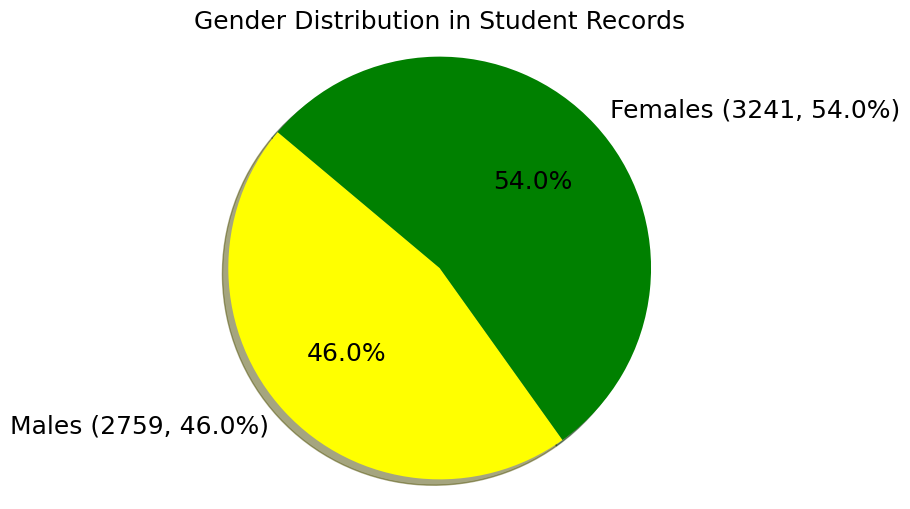

In [3]:
import matplotlib.pyplot as plt

def visualize_gender_distribution(students):
    """Visualize the gender distribution in the student records using a pie chart with counts and percentages."""
    male_count = sum(1 for student in students if student['Gender'] == 'Male')
    female_count = sum(1 for student in students if student['Gender'] == 'Female')

    # Data for pie chart
    sizes = [male_count, female_count]
    colors = ['yellow', 'green']

    # Create labels with counts and percentages
    labels = [f'Males ({male_count}, {100 * male_count / sum(sizes):.1f}%)', 
              f'Females ({female_count}, {100 * female_count / sum(sizes):.1f}%)']

    # Create pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 18})

    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Gender Distribution in Student Records',fontsize=18)
    plt.show()

# Load students data from records.csv
students = read_student_data('records.csv')

# Visualize gender distribution
visualize_gender_distribution(students)

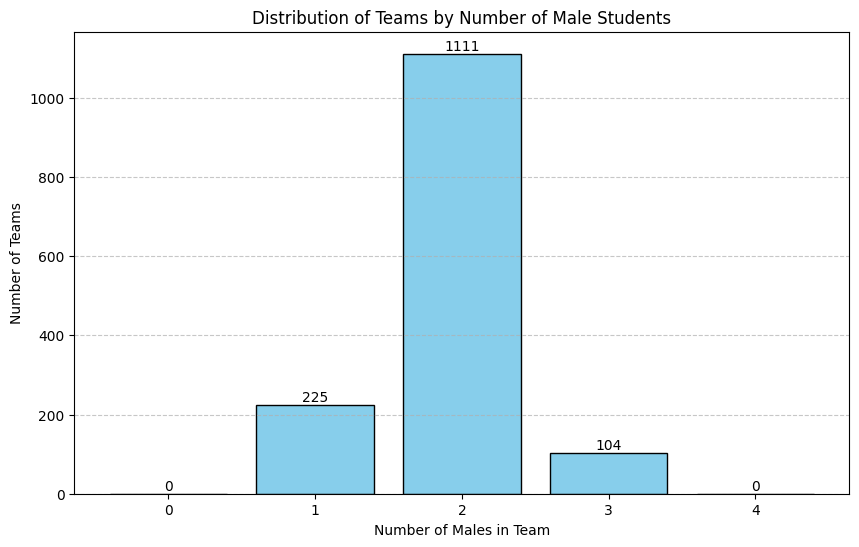

In [10]:
def count_males_in_teams(group_division, team_size):
    """Count the number of males in each team and categorize them based on team_size."""
    male_counts = [0] * (team_size + 1)  # Initialize a list to count males in categories 0 to team_size

    for team in group_division:
        male_count = sum(1 for student in team if student['Gender'] == 'Male')
        # Increment the appropriate category
        if male_count <= team_size:
            male_counts[male_count] += 1

    return male_counts

def visualize_male_team_distribution(male_counts, team_size):
    # Categories for the x-axis (0 to team_size males)
    categories = range(team_size + 1)  # 0, 1, ..., team_size
    team_counts = male_counts

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, team_counts, color='skyblue', edgecolor='black')

    # Adding labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
                 ha='center', va='bottom', fontsize=10)  # Centered above the bar

    # Customizing the plot
    plt.xticks(categories)  # Set x-ticks to be 0 to team_size
    plt.xlabel("Number of Males in Team")
    plt.ylabel("Number of Teams")
    plt.title("Distribution of Teams by Number of Male Students")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

# Run the analysis and visualization
team_size = team_size #dynamic 4-10. 
male_counts = count_males_in_teams(group_division, team_size)
visualize_male_team_distribution(male_counts, team_size)

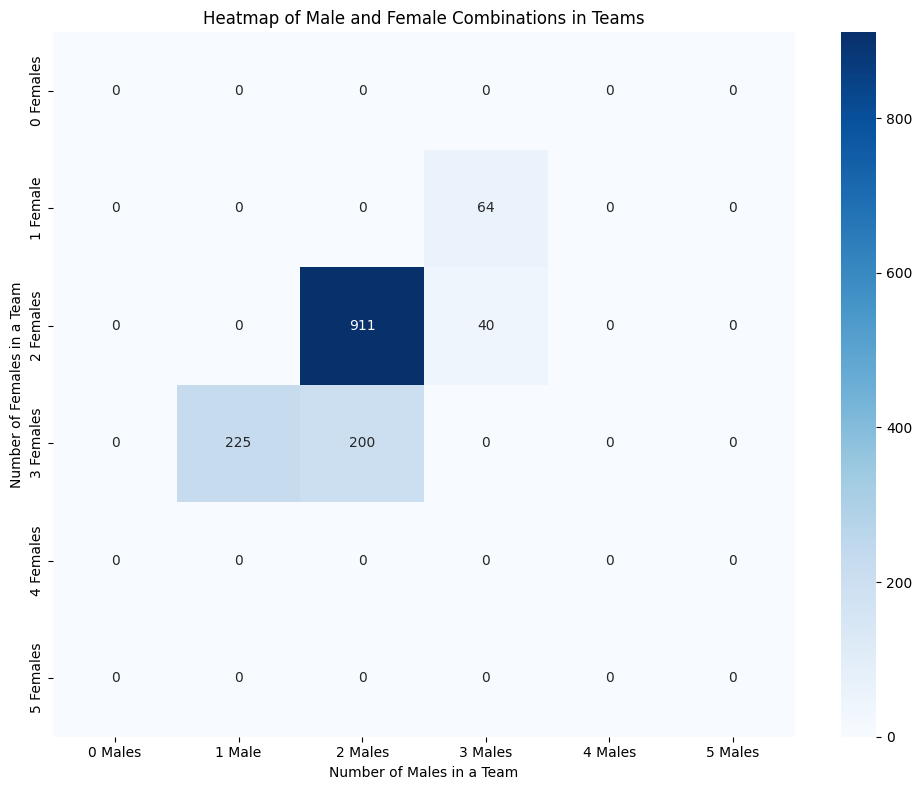

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_gender_heatmap_data(teams):
    """Create data for heatmap: count of male and female combinations in teams."""
    heatmap_data = [[0] * 6 for _ in range(6)]  # 6 categories for 0 to 5 males and females

    for team in teams:
        male_count = sum(1 for student in team if student['Gender'] == 'Male')
        female_count = sum(1 for student in team if student['Gender'] == 'Female')
        
        if male_count <= 5 and female_count <= 5:
            heatmap_data[female_count][male_count] += 1  # Row: Female count, Column: Male count

    return heatmap_data

def visualize_gender_heatmap(heatmap_data):
    """Visualize the number of males and females in teams as a heatmap."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', cbar=True,
                xticklabels=['0 Males', '1 Male', '2 Males', '3 Males', '4 Males', '5 Males'],
                yticklabels=['0 Females', '1 Female', '2 Females', '3 Females', '4 Females', '5 Females'])
    
    plt.title('Heatmap of Male and Female Combinations in Teams')
    plt.xlabel('Number of Males in a Team')
    plt.ylabel('Number of Females in a Team')
    plt.tight_layout()
    plt.show()

# Assuming you have already formed your teams
heatmap_data = create_gender_heatmap_data(group_division)  # group_division should be defined
visualize_gender_heatmap(heatmap_data)